# Perkenalan

Milestone 2

Nama  : M Hafiz Juliant

Batch : RMT-028

Dataset : Loan Status Prediction (https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data)

Objective : Project ini dibuat untuk membuat model dari 5 jenis model yaitu K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest Classifier, Decision Tree Classifier, Gradient Boosting. Model ini digunakan untuk memprediksi Status Pinjaman di Bank (Loan Status)

## Dataset Information

| Variable | Definition |
| --- | --- |
|Loan_ID| A unique loan ID.|
|Gender| Either male or female.|
|Married| Weather Married(yes) or Not Marttied(No).|
|Dependents| Number of persons depending on the client.|
|Education| Applicant Education(Graduate or Undergraduate).|
|Self_Employed| Self-employed (Yes/No).|
|ApplicantIncome| Applicant income.|
|CoapplicantIncome| Co-applicant income.|
|LoanAmount| Loan amount in thousands.|
|Loan_Amount_Term| Terms of the loan in months.|
|Credit_History| Credit history meets guidelines.|
|Property_Area| Applicants are living either Urban, Semi-Urban or Rural.|
|Loan_Status| Loan approved (Y/N)|


# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from phik import phik_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
#load file

df = pd.read_csv('loan_data.csv')

df_ori = df.copy()

In [3]:
#Menampilkan 5 data teratas
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
#Menampilkan 5 data terbawah
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analys

In [5]:
#Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Loan_ID              381
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Insight :
- Terdapat 381 baris dan 13 kolom
- Terdapat 4 kolom numerik , 8 kolom categorik
- Terdapat missing value pada kolom 'Gender','Self_Employed','Loan_Amount_Term' dan 'Credit_History'
- Tidak terdapat kolom yang duplikat

In [10]:
# Mengisi data nan dengan modus dan mengubah type data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)

In [11]:
# Mengubah data cat menjadi numerical label
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 3], inplace=True)

c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(df, c_variables)

In [12]:
#Menyimpan file untuk digunakan pada deployment
df.to_csv('deploy.csv', index=False)

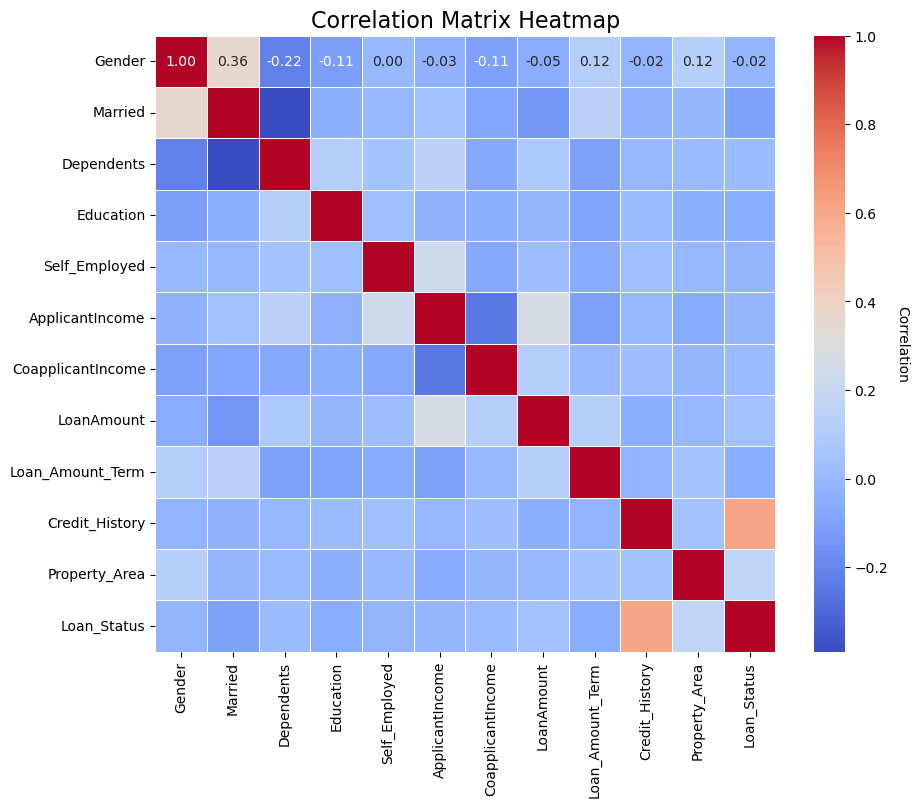

In [13]:
# Membuat plot correlation matrix
correlation_matrix = df.drop('Loan_ID', axis=1).corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
heatmap.set_title("Correlation Matrix Heatmap", fontsize=16)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=15)

plt.show()

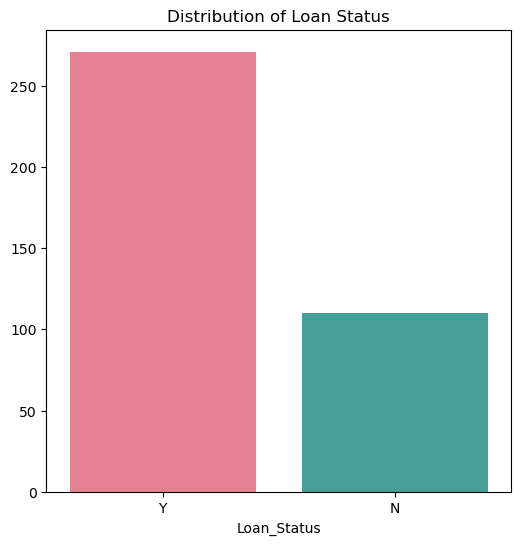

In [14]:
#Menampilkan distribusi loan_status
plt.figure(figsize=(6, 6))
sns.barplot(x=df_ori['Loan_Status'].value_counts().index, y=df_ori['Loan_Status'].value_counts().values, palette='husl')
plt.title('Distribution of Loan Status')
plt.show()



Lebih dari setengah proposal peminjaman dari peminjam diterima dengan perbandingan hampir 3:1

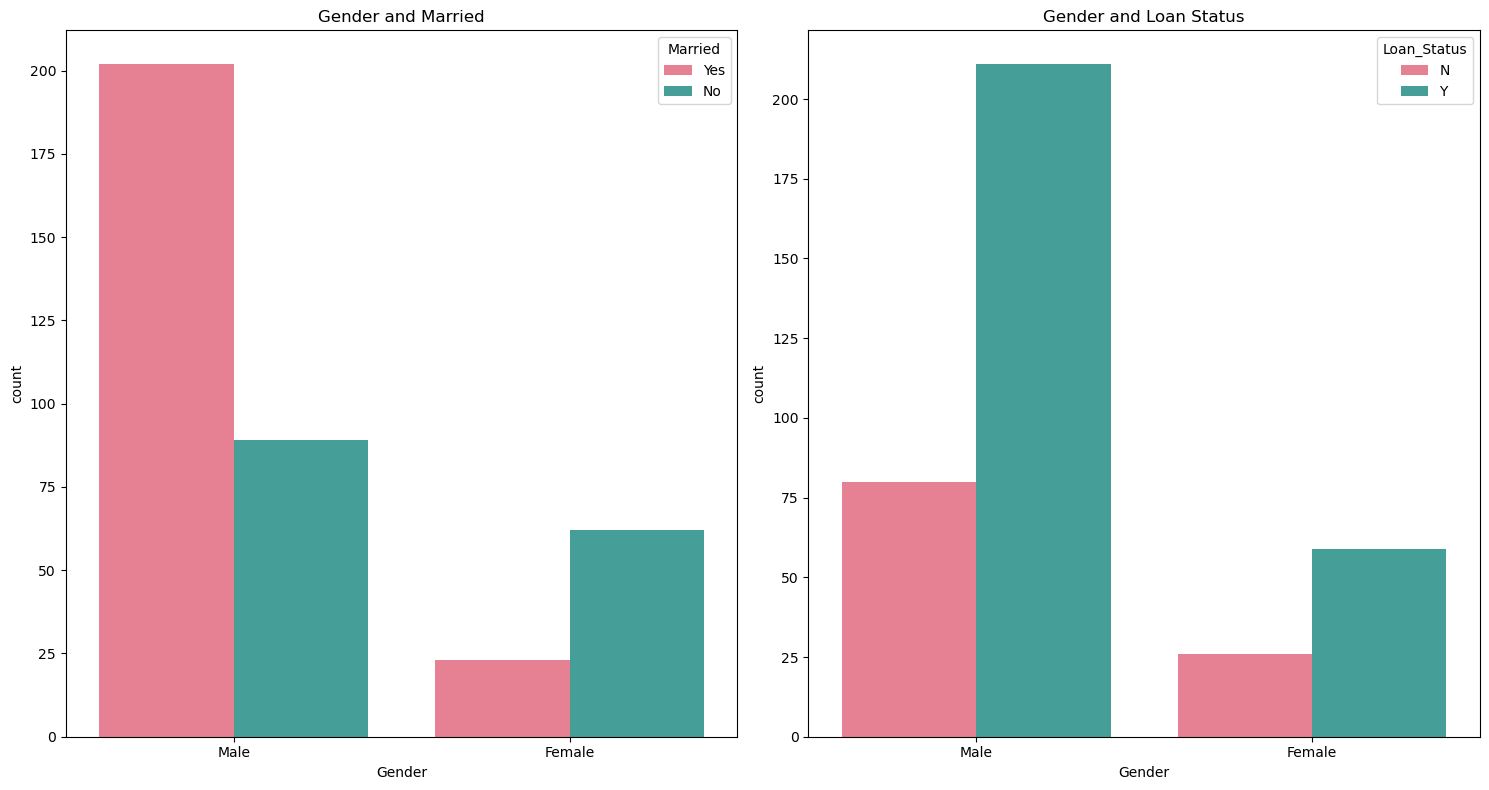

In [15]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 8))

# Menampilkan plot untuk Gender dan Married
plt.subplot(1, 2, 1)
sns.countplot(data=df_ori, x='Gender', hue='Married', palette='husl')
plt.title('Gender and Married')

# Menampilkan plot untuk Gender dan Loan_Status
plt.subplot(1, 2, 2)
sns.countplot(data=df_ori, x='Gender', hue='Loan_Status', palette='husl')
plt.title('Gender and Loan Status')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

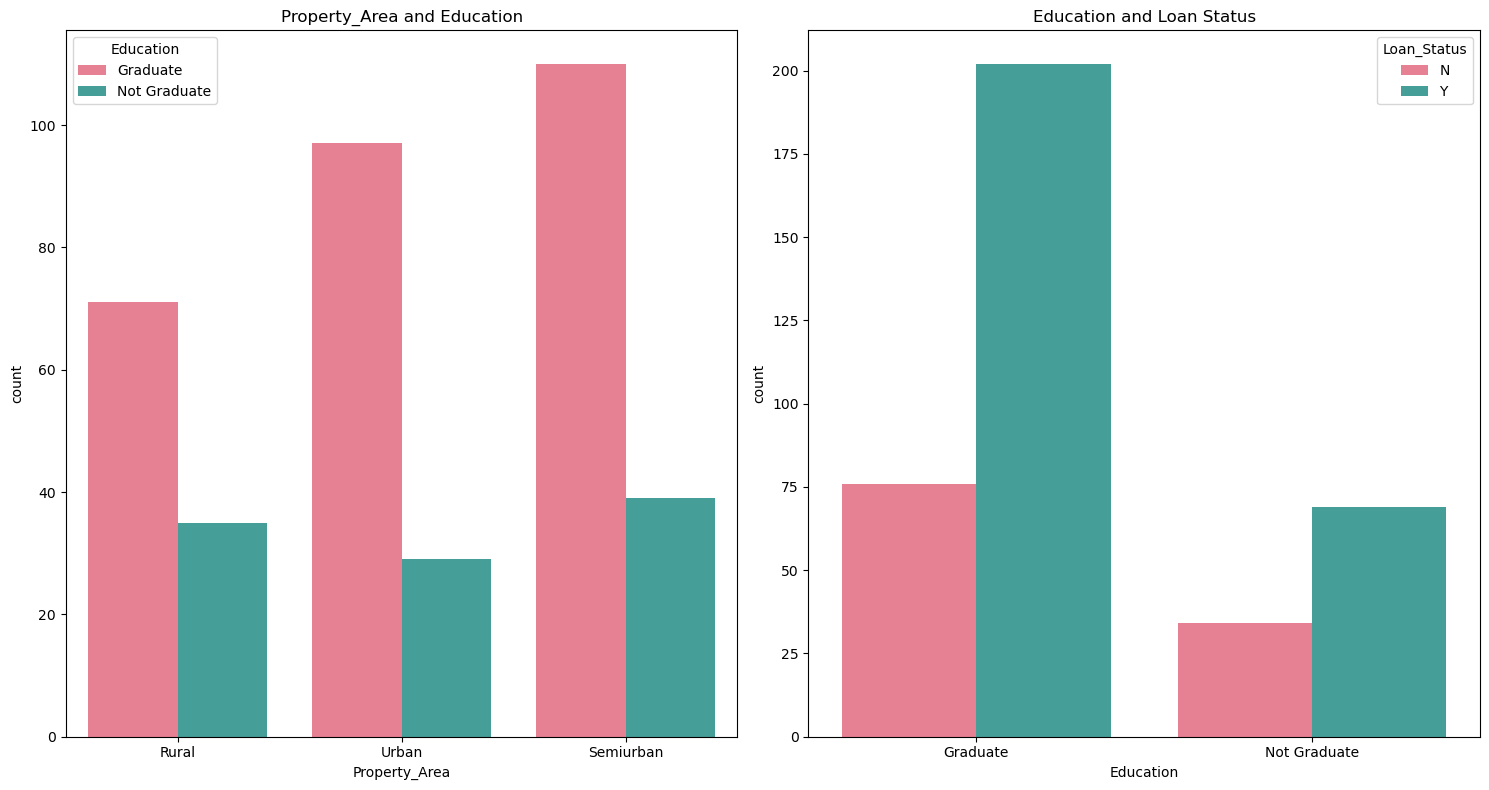

In [16]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 8))

# Menampilkan plot untuk Gender dan Married
plt.subplot(1, 2, 1)
sns.countplot(data=df_ori, x='Property_Area', hue='Education', palette='husl')
plt.title('Property_Area and Education')

# Menampilkan plot untuk Gender dan Loan_Status
plt.subplot(1, 2, 2)
sns.countplot(data=df_ori, x='Education', hue='Loan_Status', palette='husl')
plt.title('Education and Loan Status')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

Income_Category
High      189
Low       100
Medium     92
Name: count, dtype: int64


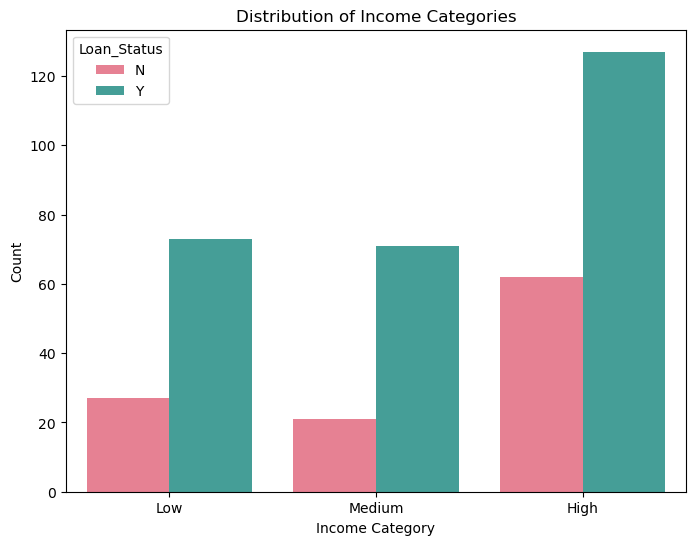

In [17]:
# Hitung kuartil dari pendapatan
income_qtiles = df_ori['ApplicantIncome'].quantile([0.25, 0.5, 0.75])

# Definisikan batas kuartil untuk kategori pendapatan
low_income = income_qtiles[0.25]
medium_income = income_qtiles[0.5]
high_income = income_qtiles[0.75]

# Membuat fungsi untuk mengkategorikan pendapatan
def categorize_income(income):
    if income <= low_income:
        return 'Low'
    elif income <= medium_income:
        return 'Medium'
    else:
        return 'High'

# Menambahkan kolom 'Income_Category' ke DataFrame
df_ori['Income_Category'] = df_ori['ApplicantIncome'].apply(categorize_income)

# Memeriksa distribusi kategori pendapatan
print(df_ori['Income_Category'].value_counts())

# Visualisasi distribusi kategori pendapatan
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df_ori, order=['Low', 'Medium', 'High'], hue='Loan_Status', palette='husl')
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

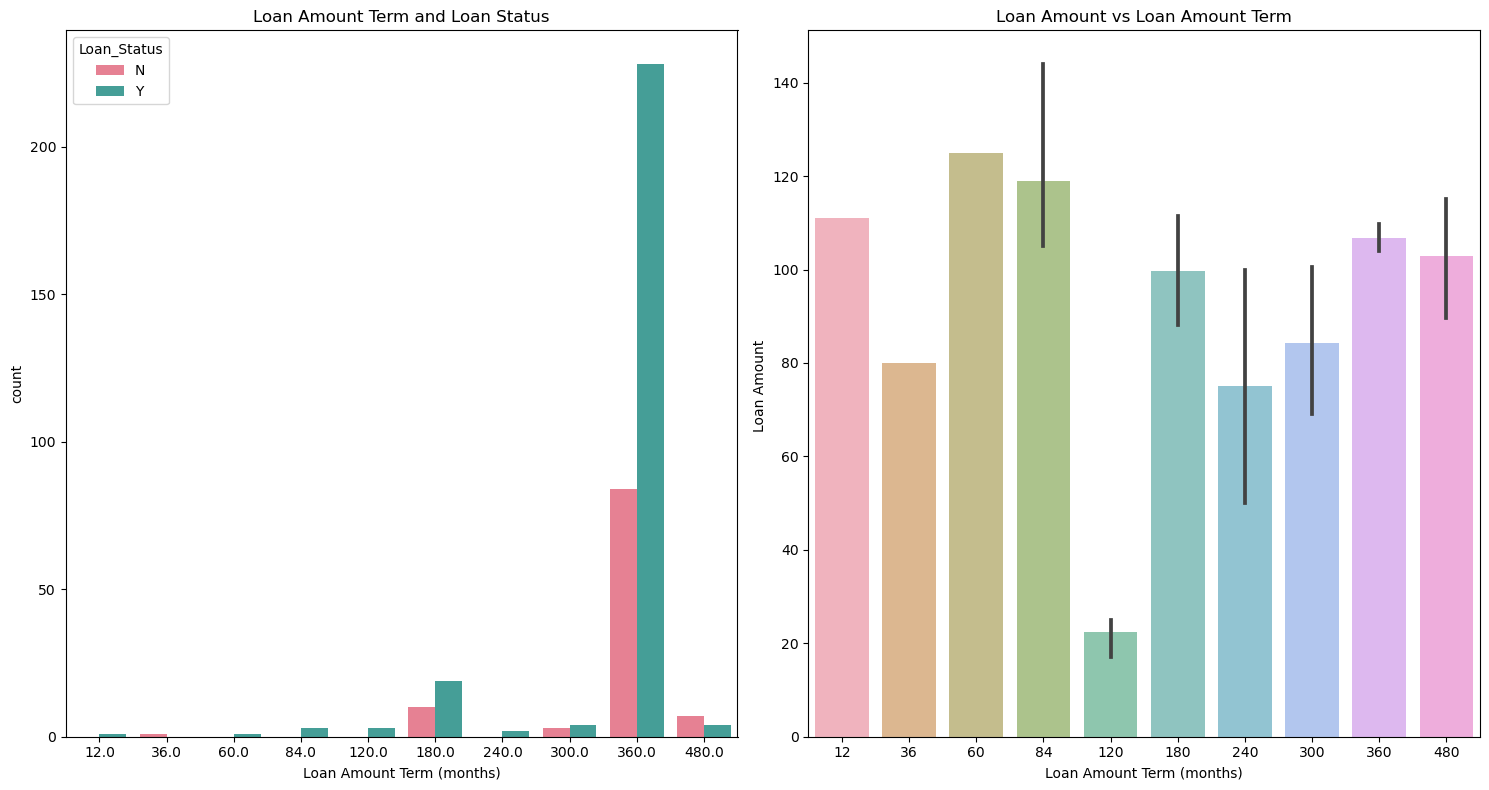

In [18]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.countplot(data=df_ori, x='Loan_Amount_Term', hue='Loan_Status', palette=('husl'))
plt.title('Loan Amount Term and Loan Status')
plt.xlabel('Loan Amount Term (months)')

plt.subplot(1,2,2)
sns.barplot(data=df, x='Loan_Amount_Term', y='LoanAmount', palette='husl', alpha=0.6)
plt.title('Loan Amount vs Loan Amount Term')
plt.xlabel('Loan Amount Term (months)')
plt.ylabel('Loan Amount ')

plt.tight_layout()
plt.show()

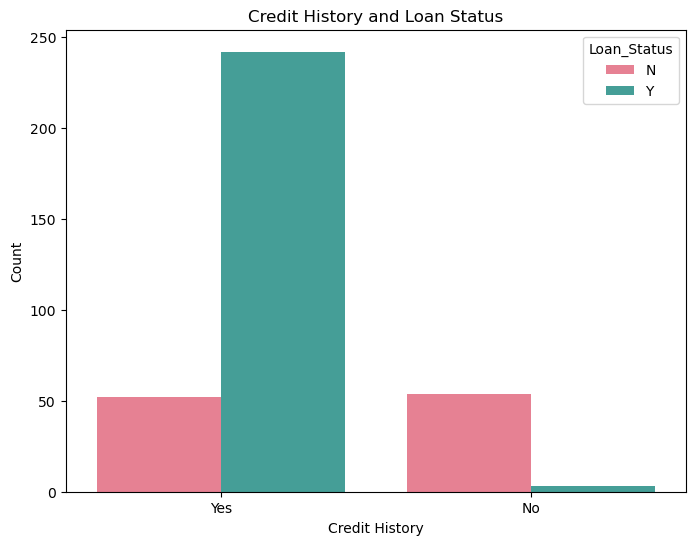

In [19]:
Credit_Hist = df_ori['Credit_History'].replace({0.0: 'No', 1.0: 'Yes'})

plt.figure(figsize=(8, 6))
sns.countplot(data=df_ori, x=Credit_Hist, hue='Loan_Status', palette='husl')
plt.title('Credit History and Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Dependents')

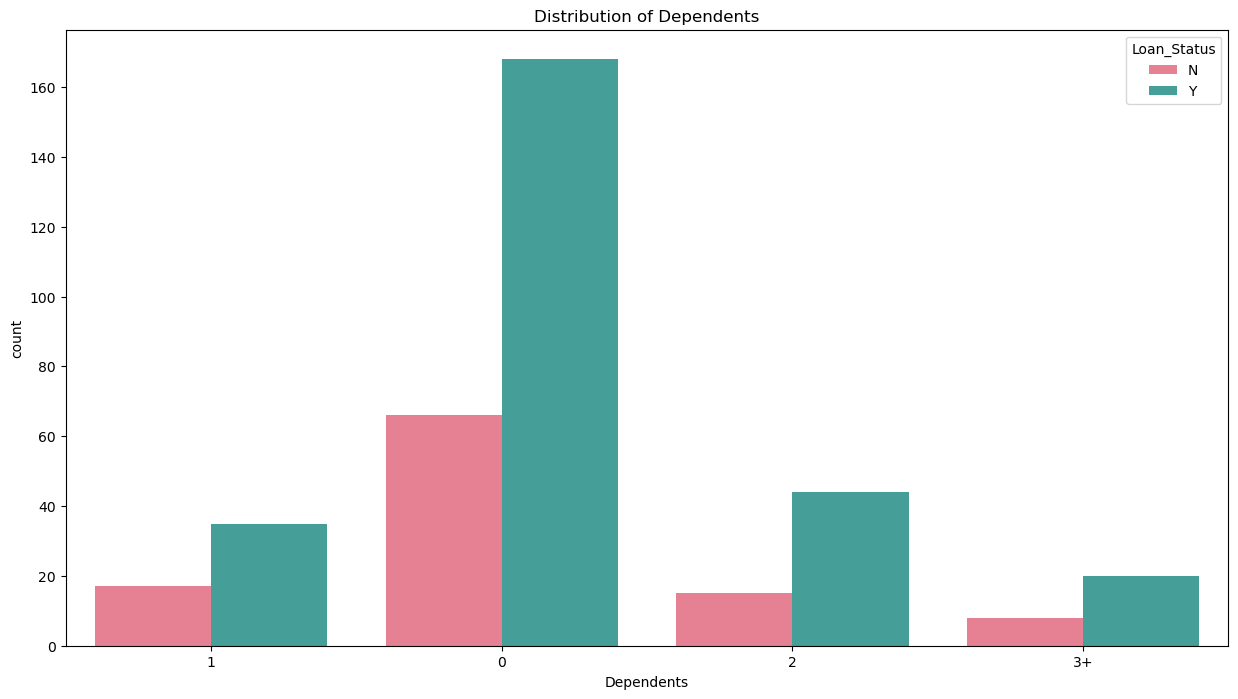

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_ori, x='Dependents', hue='Loan_Status', palette='husl')
plt.title('Distribution of Dependents')

Text(0.5, 1.0, 'Distribution of Self Employed')

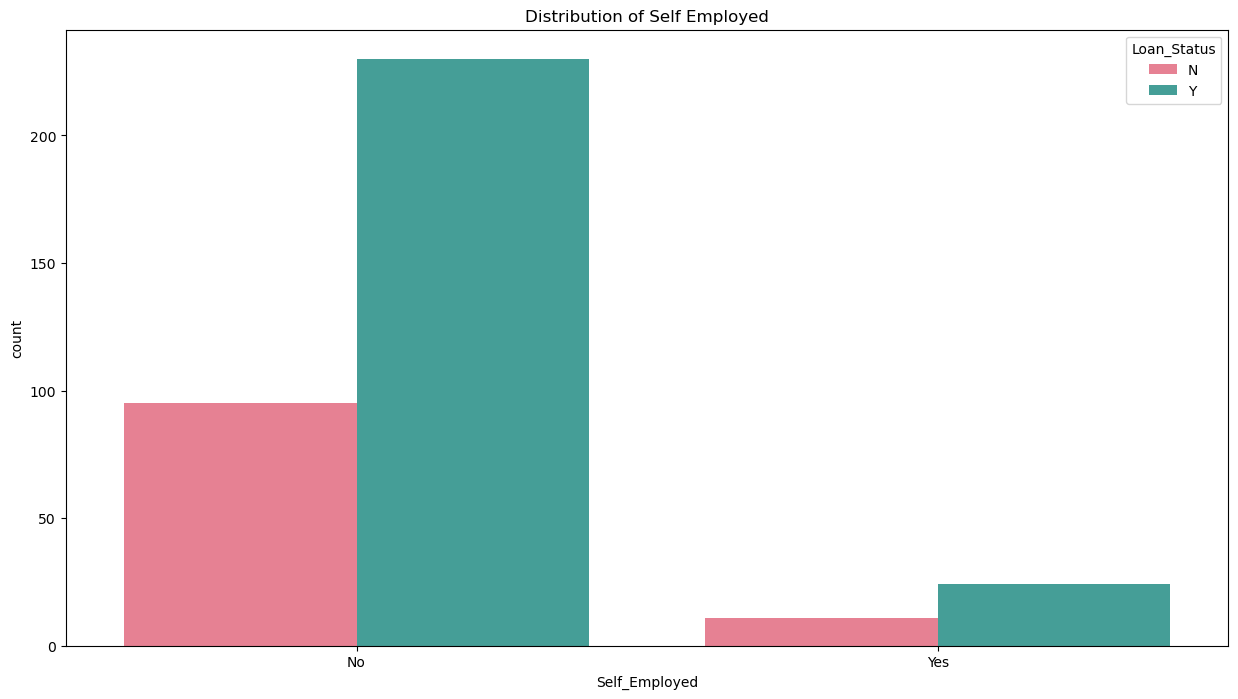

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_ori, x='Self_Employed', hue='Loan_Status', palette='husl')
plt.title('Distribution of Self Employed')

Dari data diatas dapat disimpulkan bahwa:

1. Laki-laki lebih banyak mengajukan peminjaman ke bank dibandingkan dengan perempuan dan mayoritas sudah menikah, hal ini dapat diasumsikan bahwa pengeluaran dan kebutuhan orang yang sudah menikah lebih besar dibandingkan dengan yang belum menikah serta laki laki yang sudah memiliki tanggung jawab untuk membiayai semua kebutuhan keluarga dan rumah tangga.
2. Nasabah yang sudah lulus pinjaman yang disetujui bank lebih banyak daripada yang belum lulus, hal ini dikarenakan nasabah yang sudah lulus biasa sudah memiliki pekerjaan dan penghasilan serta dapat membayar cicilan sendiri sedangkan nasabah yang belum lulus biasanya belum memiliki penghasilan dan cicilannya dibayarkan oleh walinya. Kemungkinan hal hal tersebut yang menjadi faktor bank menyetujui peminjaman
4. Nasabah yang bekerja sendiri(wirausaha) membayar pinjaman lebih sedikit daripada yang tidak(karyawan), kemungkinan nasabah yang berwirausaha melakukan pinjaman dengan memakai nama usaha atau perusahaan mereka sendiri bukan memakai nama pribadi.
5. Pinjaman jangka panjang lebih mungkin untuk diterima daripada pinjaman jangka pendek, hal ini dikarenakan pinjaman jangka pendek kemungkinan cicilan terselesaikan lebih tinggi daripada pinjaman jangka panjang
6. Nasabah dengan Riwayat Kredit yang lebih baik cenderung diterima peminjamannya dibanding dengan nasabah yang memiliki Riwayat Kredit yang buruk, kemungkinan nasabah dengan riwayat buruk ini sering terlambat membayar cicilan atau bahkan tidak menyelesaikan cicilan pada peminjaman sebelumnya yang mengakibatkan bank enggan untuk menyetujui peminjamannya
7. Nasabah dari wilayah semi urban lebih mungkin diterima pinjamannya dibandingkan Nasabah dari wilayah urban dan Nasabah dari wilayah rural
8. Nasabah yang tidak memiliki tanggungan lebih mungkin diterima pinjamannya dibanding nasabah dengan 2 Tanggungan, nasabah dengan 1 Tanggungan dan 3+ Tanggungan


# Feature Engineering

## Handling Missing Value

In [22]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Tidak ditemukan missing value, karena sebelumnya telah dilakukan handling pada proses EDA

## Handling Outlier

In [23]:
df1= df.drop(['Loan_ID'], axis=1)

In [24]:
# Lets look at the number and percentage of outliers
def skew_boundary(data, column):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    low = data[column].quantile(0.25) - (3 * iqr)
    up = data[column].quantile(0.75) + (3 * iqr)
    return low, up

def normal_boundary(data, column):
    low = data[column].mean() - (3 * data[column].std())
    up = data[column].mean() + (3 * data[column].std())
    return low, up

for col in df1.columns.tolist():
    if abs(df1[col].skew()) > 0.5:
        low, up = skew_boundary(df1, col)
    else:
        low, up = normal_boundary(df1, col)
    print(f"Persentase outlier {col}: {len(df1[(df1[col] < low) | (df1[col] > up)])/len(df1)*100:.2f}%")

Persentase outlier Gender: 22.31%
Persentase outlier Married: 0.00%
Persentase outlier Dependents: 0.00%
Persentase outlier Education: 0.00%
Persentase outlier Self_Employed: 9.19%
Persentase outlier ApplicantIncome: 0.26%
Persentase outlier CoapplicantIncome: 0.79%
Persentase outlier LoanAmount: 0.00%
Persentase outlier Loan_Amount_Term: 15.22%
Persentase outlier Credit_History: 14.96%
Persentase outlier Property_Area: 0.00%
Persentase outlier Loan_Status: 0.00%


Tidak dilakukan handling outlier karena sebagian feature memiliki outlier yang sangat kecil (mendekati 0) yang masih dapat diterima,lalu sebagian lagi cukup besar sehingga akan membuat data tidak real jika dilakukan capping atau terlalu banyak data yang di drop jika dilakukan trimming.

In [25]:
# Split inference data
df_inf = df.sample(n = 1, random_state = 1)

# Delete inference from data
df.drop(df_inf.index, inplace = True)

# Reset data index
df.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

df_inf = df_inf.drop('Loan_Status', axis=1)

# Saving inference to csv
df_inf.to_csv('inference.csv', index=False)

Memisahkan data inference menggunakan salah satu sample pada dataset

## Split X & y

In [26]:
df.phik_matrix()

interval columns not set, guessing: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gender,1.0,1.000000,0.519712,0.312744,0.147360,0.000000,0.114690,0.030798,0.000000,0.020056,0.000000,0.061651,0.000000
Married,1.0,0.519712,1.000000,0.569649,0.000000,0.000000,0.000000,0.096833,0.155343,0.125246,0.000000,0.000000,0.107012
Dependents,1.0,0.312744,0.569649,1.000000,0.120931,0.000000,0.136752,0.000000,0.000000,0.193495,0.000000,0.000000,0.000000
Education,1.0,0.147360,0.000000,0.120931,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029491,0.000000
Self_Employed,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.385451,0.000000,0.000000,0.205502,0.000000,0.000000,0.000000
ApplicantIncome,1.0,0.114690,0.000000,0.136752,0.000000,0.385451,1.000000,0.000000,0.277337,0.000000,0.000000,0.067432,0.000000
CoapplicantIncome,1.0,0.030798,0.096833,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.064191,0.000000,0.000000
LoanAmount,1.0,0.000000,0.155343,0.000000,0.000000,0.000000,0.277337,0.000000,1.000000,0.430634,0.000000,0.219166,0.000000
Loan_Amount_Term,1.0,0.020056,0.125246,0.193495,0.000000,0.205502,0.000000,0.000000,0.430634,1.000000,0.070562,0.107307,0.152583


Untuk Split X dan y diambil feature X yang memiliki nilai korelasi y dengan nilai diatas 0 

In [27]:
X = df[['Married','Loan_Amount_Term','Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [28]:
X

,Married,Loan_Amount_Term,Credit_History,Property_Area
0,0,360,1,0
1,0,360,1,1
2,0,360,1,1
3,1,360,1,1
4,0,360,1,1
...,...,...,...,...
375,0,360,1,1
376,0,360,1,0
377,1,360,1,0
378,0,180,1,0


In [29]:
#split x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling & Encoding with Pipeline

In [30]:
# Define the preprocessing steps
numeric_features = ['Loan_Amount_Term']  # Assuming these are the indices of numerical features
categorical_features = ['Married','Credit_History', 'Property_Area']  # Assuming these are the indices of categorical features

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model Definition

In [31]:
#Model Definition using pipeline
pipe_svc = Pipeline([("prepro" , preprocessor),("clf", SVC())])
pipe_dt = Pipeline([("prepro", preprocessor),("clf", DecisionTreeClassifier(random_state=10))])
pipe_rf = Pipeline([("prepro", preprocessor),("clf",RandomForestClassifier(random_state=10))])
pipe_knn = Pipeline([("prepro", preprocessor),("clf", KNeighborsClassifier())])
pipe_gb = Pipeline([("prepro", preprocessor),("clf", GradientBoostingClassifier())])

In [32]:
skfold = StratifiedKFold(n_splits = 5)

In [33]:
# Define Cross Validation for each model
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)
cv_gb_model = cross_val_score(pipe_gb, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [34]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores=0
for cv,name in zip([cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_gb_model],
                   ['svm_model','dt_model','rf_model','knn_model','gb_model']):
  print(name)
  print('f1score - All - Cross Validation :', cv)
  print('f1score - Mean - Cross Validation :', cv.mean())
  print('f1score - std - Cross Validation :', cv.std())
  print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

svm_model
f1score - All - Cross Validation : [0.90322581 0.92473118 0.92307692 0.87234043 0.91489362]
f1score - Mean - Cross Validation : 0.9076535909754853
f1score - std - Cross Validation : 0.01922792876036117
f1score - Range of Test Set : 0.8884256622151241 - 0.9268815197358464
--------------------------------------------------
dt_model
f1score - All - Cross Validation : [0.90322581 0.91304348 0.92307692 0.86315789 0.87912088]
f1score - Mean - Cross Validation : 0.8963249963294253
f1score - std - Cross Validation : 0.022085437193391174
f1score - Range of Test Set : 0.8742395591360341 - 0.9184104335228165
--------------------------------------------------
rf_model
f1score - All - Cross Validation : [0.91489362 0.92473118 0.92307692 0.86315789 0.89130435]
f1score - Mean - Cross Validation : 0.9034327930913655
f1score - std - Cross Validation : 0.023409529487196486
f1score - Range of Test Set : 0.880023263604169 - 0.9268423225785619
--------------------------------------------------
kn

Berdasarkan informasi diatas didapatkan model yang terbaik adalah menggunakan SVM Model, dengan output metric Accuracy sebesar 0.907. Oleh karena itu best model dalam program ini menggunakan SVM Model. 

# Model Training

Dalam tahapan ini melakukan fitting kepada model algoritma SVM

In [35]:
# SVM Model

pipe_svc.fit(X_train, y_train)

# Memprediksi dengan SVM baseline
y_pred_train_svm = pipe_svc.predict(X_train)
y_pred_test_svm = pipe_svc.predict(X_test)

# Model Evaluation

## Hyperparameter Tuning

### Baseline Model

SVM - Baseline

F1 Score :  0.8688524590163934 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.32      0.47        22
           1       0.78      0.98      0.87        54

    accuracy                           0.79        76
   macro avg       0.83      0.65      0.67        76
weighted avg       0.81      0.79      0.75        76
 

Confusion Matrix : 


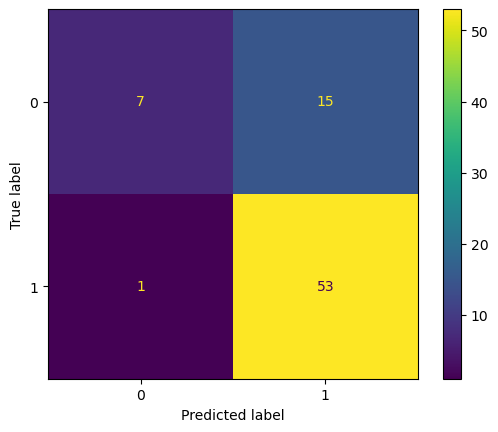

In [36]:
#predict using best model
pipe_svc.fit(X_train,y_train)

y_pred_train_svm = pipe_svc.predict(X_train)
y_pred_test_svm = pipe_svc.predict(X_test)

print('SVM - Baseline\n')
print('F1 Score : ', f1_score(y_test,y_pred_test_svm ), '\n')
print('Classification Report : \n', classification_report(y_test,y_pred_test_svm), '\n')
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test))

Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM sebesar 0.8688. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 53 dan True Negative sebesar 7. 

In [37]:
#Menyimpan F1 Score baseline model ke dataframe

report = pd.DataFrame({})
report['Baseline (SVM)'] = {
    'Train - F1 Score':f1_score(y_train,y_pred_train_svm),
    'Test - F1 Score':f1_score(y_test,y_pred_test_svm)
    }
report

,Baseline (SVM)
Train - F1 Score,0.914163
Test - F1 Score,0.868852


### Random Search

In [38]:
#Random search

random_search_params = {
    'clf__C':[0.1,1,10],
    'clf__kernel':['linear','poly','rbf','sigmoid'],
    'clf__gamma':['scale','auto']
}

model_svm_random = RandomizedSearchCV(estimator= pipe_svc,
                                    param_distributions=random_search_params,
                                    n_iter = 20,
                                    cv = 5,
                                    random_state=3,
                                    scoring = 'f1')

model_svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prepro',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Loan_Amount_Term']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Married',
                                                                                'Credit_History',
                                                                                'Property_Area'])])),
                                             ('clf', SVC())]),
                   n_iter=20,
                   param_distributions={'clf__C': [0.1, 1, 10],
                                        'clf__gamma': ['scale', 'auto'],
                                        'clf__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   random_state=3, scoring='f1')

In [39]:
model_svm_random.best_params_

{'clf__kernel': 'poly', 'clf__gamma': 'auto', 'clf__C': 10}

SVM - Random Search

F1 Score - Test Set   :  0.8780487804878049 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.32      0.48        22
           1       0.78      1.00      0.88        54

    accuracy                           0.80        76
   macro avg       0.89      0.66      0.68        76
weighted avg       0.85      0.80      0.76        76
 

Confusion Matrix      : 


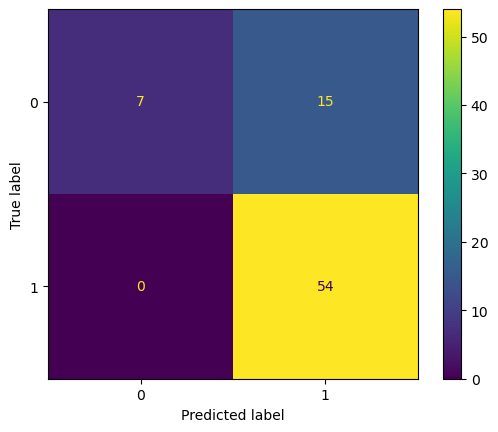

In [40]:
# Check Performance Model against Test-Set

y_pred_train_svm_random = model_svm_random.predict(X_train)
y_pred_test_svm_random = model_svm_random.predict(X_test)

print('SVM - Random Search\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm_random, X_test, y_test))

Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM sebesar 0.878. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 54 dan True Negative sebesar 7. 

In [41]:
report['SVM - Random Search'] = {
    'Train - F1 Score':f1_score(y_train,y_pred_train_svm_random),
    'Test - F1 Score':f1_score(y_test,y_pred_test_svm_random),
    }
report

,Baseline (SVM),SVM - Random Search
Train - F1 Score,0.914163,0.914163
Test - F1 Score,0.868852,0.878049


### Grid Search

In [42]:
grid_search_params = {
    'clf__C': [model_svm_random.best_params_['clf__C'],
            model_svm_random.best_params_['clf__C']+1,
            model_svm_random.best_params_['clf__C']+2,
            model_svm_random.best_params_['clf__C']+3],
    'clf__kernel':[model_svm_random.best_params_['clf__kernel']],
    'clf__gamma':[model_svm_random.best_params_['clf__gamma']]
}

model_svm_grid = GridSearchCV(estimator = pipe_svc,
                              param_grid= grid_search_params,
                              cv=5,
                              scoring= 'f1')
model_svm_grid.fit(X_train, y_train)

model_svm_grid.best_params_

{'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'poly'}

SVM - Grid Search

F1 Score - Test Set   :  0.8780487804878049 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.32      0.48        22
           1       0.78      1.00      0.88        54

    accuracy                           0.80        76
   macro avg       0.89      0.66      0.68        76
weighted avg       0.85      0.80      0.76        76
 

Confusion Matrix      : 


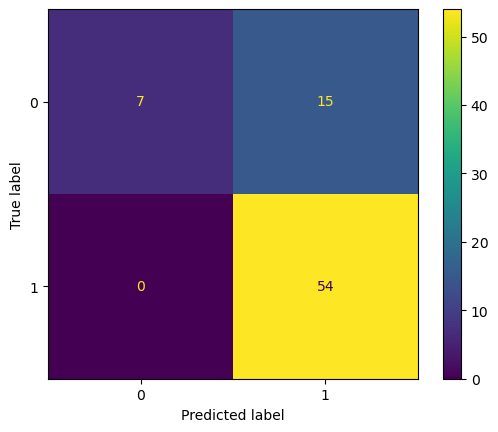

In [43]:
# Check Performance Model against Test-Set

y_pred_train_svm_grid = model_svm_grid.predict(X_train)
y_pred_test_svm_grid = model_svm_grid.predict(X_test)

print('SVM - Grid Search\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm_grid, X_test, y_test))

Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM sebesar 0.878. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 54 dan True Negative sebesar 7. 

In [44]:
report['SVM - Grid Search'] = {
    'Train - F1 Score':f1_score(y_train,y_pred_train_svm_grid),
    'Test - F1 Score':f1_score(y_test,y_pred_test_svm_grid),
    }
report

,Baseline (SVM),SVM - Random Search,SVM - Grid Search
Train - F1 Score,0.914163,0.914163,0.914163
Test - F1 Score,0.868852,0.878049,0.878049


# Model Saving

In [45]:
# Save the files!
with open('model_svm.pkl', 'wb') as file_1: 
  pickle.dump(model_svm_grid, file_1)

# with open('model_scaler.pkl', 'wb') as file_2:
#   pickle.dump(numeric_transformer, file_2)

# with open('model_encoding.pkl', 'wb') as file_3:
#   pickle.dump(categorical_transformer, file_3)

# with open('num_col.pkl', 'wb') as file_4:
#   pickle.dump(numeric_features, file_4)

# with open('cat_col.pkl', 'wb') as file_5:
#   pickle.dump(categorical_features, file_5)

# with open('pipe_svc.pkl', 'wb') as file_6:
#   pickle.dump(pipe_svc, file_6)


# Conceptual Problem


1. Latar Belakang Bagging dan Cara Kerjanya:
    Bagging atau Bootstrap Aggregating adalah teknik ensemble yang digunakan dalam pembelajaran mesin untuk meningkatkan kinerja model prediksi. Ide utama di balik bagging adalah menghasilkan beberapa model prediksi yang kemudian digabungkan untuk menghasilkan prediksi akhir yang lebih baik secara keseluruhan. Cara kerjanya adalah dengan membuat beberapa subset (sampel acak dengan penggantian) dari data pelatihan dan melatih model prediksi pada setiap subset tersebut secara independen. Kemudian, prediksi dari setiap model digabungkan (misalnya, dengan mengambil rata-rata atau mayoritas) untuk menghasilkan prediksi akhir. Bagging efektif dalam mengurangi varians dan mencegah overfitting.

2. Perbedaan Cara Kerja Random Forest dengan Boosting

    - Random Forest: Random Forest adalah algoritma ensemble yang menggunakan konsep bagging dengan pohon keputusan sebagai model dasarnya. Random Forest membuat beberapa pohon keputusan secara independen dengan menggunakan subset acak dari fitur dan data pelatihan. Setiap pohon dalam Random Forest diberi bobot yang sama dan prediksi akhirnya diambil dengan mengambil rata-rata dari prediksi semua pohon.

    - Boosting: Algoritma boosting, seperti Gradient Boosting atau AdaBoost, bekerja dengan membuat serangkaian model prediksi yang saling bergantung secara adaptif. Proses ini dimulai dengan model lemah dan secara berurutan menambahkan model berikutnya untuk memperbaiki kesalahan prediksi model sebelumnya. Model-model yang dihasilkan memiliki bobot yang berbeda-beda, dengan bobot yang lebih tinggi diberikan pada model yang lebih baik dalam memprediksi instance yang sulit.

3. Cross Validation :
    Cross Validation adalah metode statistik yang digunakan untuk mengevaluasi kinerja model prediksi dengan menggunakan set data yang terbatas. Tujuannya adalah untuk mengukur seberapa baik model akan berperforma pada data yang tidak pernah dilihat sebelumnya. Cara kerjanya adalah dengan membagi data menjadi subset pelatihan dan pengujian, lalu melatih model pada subset pelatihan dan menguji kinerjanya pada subset pengujian. Proses ini dilakukan secara berulang dengan membagi ulang data dengan cara yang berbeda-beda, dan hasil pengujian dikombinasikan untuk memberikan perkiraan akhir tentang kinerja model. Metode cross-validation membantu menghindari overfitting dan memberikan perkiraan yang lebih konsisten tentang kinerja model.

# Kesimpulan

**Eksplorasi Data**

1. Laki-laki lebih banyak mengajukan peminjaman ke bank dibandingkan dengan perempuan dan mayoritas sudah menikah, hal ini dapat diasumsikan bahwa pengeluaran dan kebutuhan orang yang sudah menikah lebih besar dibandingkan dengan yang belum menikah serta laki laki yang sudah memiliki tanggung jawab untuk membiayai semua kebutuhan keluarga dan rumah tangga.
2. Nasabah yang sudah lulus pinjaman yang disetujui bank lebih banyak daripada yang belum lulus, hal ini dikarenakan nasabah yang sudah lulus biasa sudah memiliki pekerjaan dan penghasilan serta dapat membayar cicilan sendiri sedangkan nasabah yang belum lulus biasanya belum memiliki penghasilan dan cicilannya dibayarkan oleh walinya. Kemungkinan hal hal tersebut yang menjadi faktor bank menyetujui peminjaman
4. Nasabah yang bekerja sendiri(wirausaha) membayar pinjaman lebih sedikit daripada yang tidak(karyawan), kemungkinan nasabah yang berwirausaha melakukan pinjaman dengan memakai nama usaha atau perusahaan mereka sendiri bukan memakai nama pribadi.
5. Pinjaman jangka panjang lebih mungkin untuk diterima daripada pinjaman jangka pendek, hal ini dikarenakan pinjaman jangka pendek kemungkinan cicilan terselesaikan lebih tinggi daripada pinjaman jangka panjang
6. Nasabah dengan Riwayat Kredit yang lebih baik cenderung diterima peminjamannya dibanding dengan nasabah yang memiliki Riwayat Kredit yang buruk, kemungkinan nasabah dengan riwayat buruk ini sering terlambat membayar cicilan atau bahkan tidak menyelesaikan cicilan pada peminjaman sebelumnya yang mengakibatkan bank enggan untuk menyetujui peminjamannya
7. Nasabah dari wilayah semi urban lebih mungkin diterima pinjamannya dibandingkan Nasabah dari wilayah urban dan Nasabah dari wilayah rural
8. Nasabah yang tidak memiliki tanggungan lebih mungkin diterima pinjamannya dibanding nasabah dengan 2 Tanggungan, nasabah dengan 1 Tanggungan dan 3+ Tanggungan

**Modeling**
1. Hasil dari Cross-validation menentukan SVM sebagai algoritma terbaik untuk dilakukan modeling.
2. Model SVM memiliki kelebihan untuk melakukan handling fitur dalam jumlah yang banyak. Namun, kelemahan pada model SVM ini adalah sensitif dengan outlier dan di model ini tidak di-handle outlier karena bersifat natural.
3. Hyperparameter tuning terbukti mampu mengoptimalkan performa model, pada model yang telah dibuat terjadi peningkatan performa sekitar 0.01%.
4. Model SVM dengan Grid Search dan Random Search mendapatkan hasil yang lebih baik pada train dan test dalam model jika dibandingkan dengan SVM baseline.
5. Accuracy model sudah cukup baik dalam melakukan prediksi klasifikasi atau fit, yang dapat dilihat dari hasil accuracy train sebesar 90% dan test sebesar 87%. Walaupun model dianggap overfit tapi masih dibawah 5% dan masih dapat diterima 

**Further Improvement**
1. Pada proses modeling selanjutnya disarankan untuk dilakukan dengan jumlah data yang lebih banyak agar proses training pada model lebih akurat.
2. Melakukan penambahan atau pengurangan fitur pada Feature Engineering.
3. Dapat melakukan eksplorasi lain menggunakan model lainnya seperti Random Forest, KNN, dan lain-lain walaupun SVM sudah memberikan peforma yang baik.

